# Exam 2487 B coding (40 points)

This part of the exam will carry 40 points, while the theoretical part will carry 60 points. You have in total 3 hours to complete both parts. For the theoretical part, you will complete the moodle quiz, while for part you will submit this notebook through moodle assignment. 

## Question 1 (26 points)

You need to predict whether an individual’s annual income exceeds 50,000USD using individuals' social and demographic attributes. Annual income is the target feature and is measured as a binary category target; either less than or equal to 50kUSD, or greater than 50kUSD. The target is found in the column called `income`, positive class should be having income greater than 50kUSD, and negative otherwise.

Please import the dataset  `question1_data.csv` and perform the following steps: 

a) Check the number of data instances, number of variables and data types of variables. Convert the income greater than 50kUSD  to target value 1, and 0 otherwise.  **(2pts)** 

b) Divide the dataset into 50% training set and 50% test set.  **(1pt)** 

c) Check if any of the variables have missing data, and if so, for categorical variables impute the missing values with the most frequent category, and for numerical data, impute the missing values with the mean. **(3pts)** 

d) Encode the categorical variables using one hot encoding (you can decide whether or not to drop one dummy column, based on the following steps). **(2pts)** 

e) Scale the data to be in the range between 0 and 1. **(2pts)** 

f) Pick a classifier, non ensemble, and tune it using 5-fold cross validation. The scoring metric should be-F1 score. You should tune two different parameters, 2 values each (in total 4 parameter combinations). **(4pts)** 

g) Pick an ensemble classifier and tune it using 5-fold cross validation. The scoring metric should be F1-score. You should tune two different parameters, 2 values each (in total 4 parameter combinations). **(4pts)** 

h) Pick one best model according to the F1 metric from the models tuned in the previous two steps. Evaluate its performance on the test set, by printing out the classification report and plotting the ROC curve. **(2pts)** 

i) Perform Principal Component Analysis (PCA) on the train data, processed as before (imputation of missing values, one hot encoding of categorical variables, scaling) and select the number of components that capture at least 95% of variance.  **(3pts)** 

j) Retrain the model using the selected number of the PCA components on the train data. You do not need to tune the model, only to use the same model and parameters as selected in the previous steps. Evaluate the new model again on the test data: print the classification report and plot the ROC curve. **(3pts)** 


Important notes:
- You can change the order of steps or combine them in order as you see appropriate to avoid data leakage, which will be penalized.
- Each step is graded seperately, and points will be given for correct steps even if the previous steps were not done correctly. For example, if you delete the missing values, but do the remainder of the tasks correctly, you will loose only points awarded for imputation.
- You do not need to balance the data, or check for outliers. 



__Question a)__

In [48]:
import pandas as pd

In [49]:
q1 = pd.read_csv("data/question1_data.csv")

In [50]:
# Checking number of data instances

In [51]:
len(q1)

32561

In [52]:
# There are 32561 instances.

In [53]:
q1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

In [54]:
q1.shape

(32561, 14)

In [55]:
# There are 14 variables in the dataframe.

In [56]:
q1.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,<=50K


In [57]:
# Checking the data type of the variables
q1.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
income             object
dtype: object

In [58]:
for i in range(len(q1)):
    if q1["income"][i] == "<=50K":
        q1["income"][i] = 0
    else:
        q1["income"][i] = 1

<ipython-input-58-3b9dac46b854>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1["income"][i] = 0
<ipython-input-58-3b9dac46b854>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1["income"][i] = 1


In [59]:
q1["income"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: object

__Question b)__

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y = q1["income"]

In [62]:
y = pd.DataFrame(y)

In [63]:
df = q1

In [64]:
df.drop("income", axis = 1, inplace = True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5, random_state=42)

__Question c)__

In [75]:
import numpy as np

In [67]:
y.isnull().sum()  

income    0
dtype: int64

In [68]:
df.isnull().sum()  

age               306
workclass         351
fnlwgt            307
education         318
education-num     319
marital-status    328
occupation        330
relationship      309
race              335
gender            326
capital-gain      351
capital-loss      277
hours-per-week    340
dtype: int64

In [99]:
for i in range(len(df)):
    if df["age"][i] == "NaN":
        df["age"][i] = q1["age"].mean()

In [100]:
df["age"].isnull().sum()

306

In [91]:
df[df["age"] == "NaN"] = q1["age"].mean()

In [98]:
df["age"].isnull().sum()

306

In [97]:
df.loc[df["age"] == "NaN", "age"] = q1["age"].mean()

In [90]:
df.loc[df["age"].isnull() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
60,NaN,Private,59496.0,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,2407.0,0.0,40.0
149,NaN,?,174662.0,NaN,10.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,40.0
196,NaN,NaN,99374.0,Some-college,10.0,Divorced,Craft-repair,Not-in-family,White,Male,0.0,NaN,40.0
544,NaN,Private,201872.0,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0
660,NaN,Self-emp-not-inc,335183.0,12th,8.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32127,NaN,Private,187465.0,11th,7.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,40.0
32157,NaN,Self-emp-not-inc,49595.0,NaN,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,80.0
32188,NaN,Private,153416.0,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,55.0
32203,NaN,Federal-gov,223206.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,15024.0,0.0,40.0


## Question 2 (14 points)
You need to perform clustering using the dataset `question2_data.csv`. Please perform the following steps: 

a) import the dataset and and check the number of data instances, number of variables and data types of variables **(2pts)** 

b) Scale the data to achieve zero mean and unit variance. **(2pts)** 

b) Perform Kmeans for number of clusters varying from 2 to 10, inclusively. **(2pts)** 

c) Using two different metrics of your choice, select an appropriate number of clusters, justify it, and rerun the clustering for the selected number of clusters. **(3pts)** 

d) Visualize the clusters from the previous step using TSNE method, where each cluster should be plotted with a different color. **(2pts)** 

e) Perform DBSCAN clustering on the scaled dataset with 4 different parameter values and report the number of clusters found for each parameter value. **(3pts)**


In [103]:
# question a

In [102]:
q2 = pd.read_csv("data/question2_data.csv")

In [105]:
# Number of data instances
len(q2)

1000

In [107]:
#Number of variables
q2.shape

# There are 10 variables

(1000, 10)

In [109]:
# Data types of the variables
q2.dtypes

feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
feature_6    float64
feature_7    float64
feature_8    float64
feature_9    float64
dtype: object

In [110]:
# question b)
df2 = q2

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(q2)

In [115]:
from sklearn.cluster import KMeans

In [117]:
kmeans_kwargs = {
      "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
 }

sse = []
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_data)
     sse.append(kmeans.inertia_)

In [118]:
#question c)

In [121]:
import matplotlib.pyplot as plt

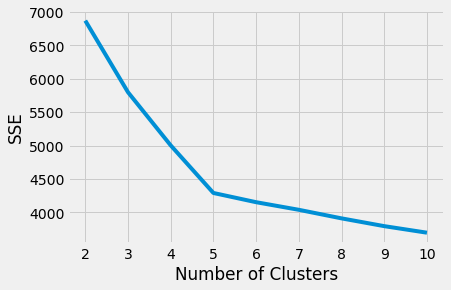

In [122]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show();

In [123]:
# From the "Elbow Method", I would select the optimal number of clusters as being 5.

In [126]:
from sklearn.metrics import davies_bouldin_score
DB_score = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    score = davies_bouldin_score(scaled_data, kmeans.labels_)
    DB_score.append(score)

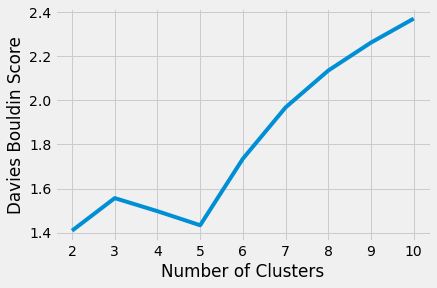

In [127]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), DB_score)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Score")
plt.show();

In [128]:
# This method also points to 5 as the number of clusters. So I choose 5 as the appropriate number of clusters

In [129]:
kmeans = KMeans(
           init="random",
           n_clusters=5,
           n_init=10,
           max_iter=300,
           random_state=42
 )


In [130]:
# question d)

In [131]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42,  perplexity = 10)

X_tsne = tsne.fit_transform(scaled_data)
print("Original shape: {}".format(str(scaled_data.shape)))
print("Reduced shape: {}".format(str(X_tsne.shape)))

Original shape: (1000, 10)
Reduced shape: (1000, 2)


In [133]:
from sklearn.datasets import make_swiss_roll
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [136]:
import seaborn as sns

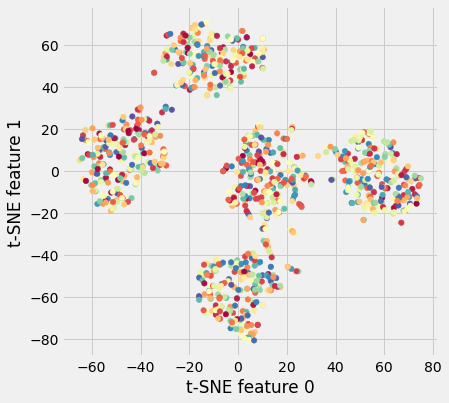

In [140]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],  s=30, c=color , cmap=plt.cm.Spectral)
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1");

In [141]:
# Note: didn't manage to get each cluster with a different color

In [142]:
#Question e)

In [143]:
from sklearn.cluster import DBSCAN

In [153]:
clustering = DBSCAN(eps=3, min_samples=10).fit_predict(scaled_data)